In [1]:
# import gmaps
# import matplotlib
# matplotlib.matplotlib_fname()
# import scipy as s
# import matplotlib.pylab as p #pylab is part of matplotlib

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import numpy as np
import requests
import json
import requests
# import ipywidgets as widgets
# from ipywidgets.embed import embed_minimal_html
import gmaps
import os
import csv

# Import API key
from menu_key import ow_api_key, census_api_key
from menu_key import gkey
gmaps.configure(api_key=gkey)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)
print("HELLO")

HELLO


In [2]:
# Read CSV
demo_data_ = pd.read_csv("Resources/AnalyticsDemo_Age_City.csv")
# Drop all rows with missing information
demo_data = demo_data_.dropna(how='any').reset_index(drop=True)


demo_rev = demo_data["Revenue"].astype(int)

# demo_city_sum = demo_data.groupby(['City','Age']).sum().reset_index(drop=False)
# demo_city_sum
# demo_age_city = demo_data.groupby(['Age','City','Revenue']).sum().reset_index(drop=False)
demo_age_city = demo_data[['Age','City','Revenue']]
demo_age_city = demo_age_city.reset_index(drop=True)
demo_data.head(3)
# type(demo_age_city)
# demo_age_city.head()
# demo_data.groupby(['City','Revenue']).sum()

,Age,City,Users,New Users,Sessions,Bounce Rate,Pages per Session,AvgSeshDur,Transactions,Revenue,ECR
0,18-24,not set 18,24,22,26.0,3.85,5.04,116,0,0.00,0.00
1,25-34,not set 25,142,122,186.0,2.15,5.95,219,0,0.00,0.00
2,35-44,not set 35,85,70,130.0,2.31,6.71,232,3,530.52,2.31


In [3]:

bins =  [0, 99, 299, 599, 899, 1499, 3999]

group_names = ['$0-99', '$100-299', '$300-599', '$600-899', '$1500-3999', 'over $4000']
demo_age_city_ = pd.DataFrame(demo_age_city)

# demo_age_city_ = pd.to_numeric(demo_age_city_['Revenue'], errors='coerce')
# demo_age_city_ = demo_age_city_.sort_values('Revenue', ascending = True)
demo_age_city_['Spent_Group'] = pd.cut(demo_age_city_['Revenue'], bins, labels=group_names)
demo_age_city_ = demo_age_city_.replace(np.nan, "$0-99")

# demo_age_city_ = pd.cut(demo_age_city_.fillna(np.nan), bins, include_lowest=True, labels=group_names)

demo_age_city_.head(10)
# len(demo_age_city_)


,Age,City,Revenue,Spent_Group
0,18-24,not set 18,0.00,$0-99
1,25-34,not set 25,0.00,$0-99
2,35-44,not set 35,530.52,$300-599
3,45-54,not set 45,0.00,$0-99
4,55-64,not set 55,0.00,$0-99
5,65+,not set 65,0.00,$0-99
6,25-34,Amsterdam,0.00,$0-99
7,25-34,Atlanta,0.00,$0-99
8,35-44,Atlanta,0.00,$0-99
9,25-34,Austin,599.90,$600-899


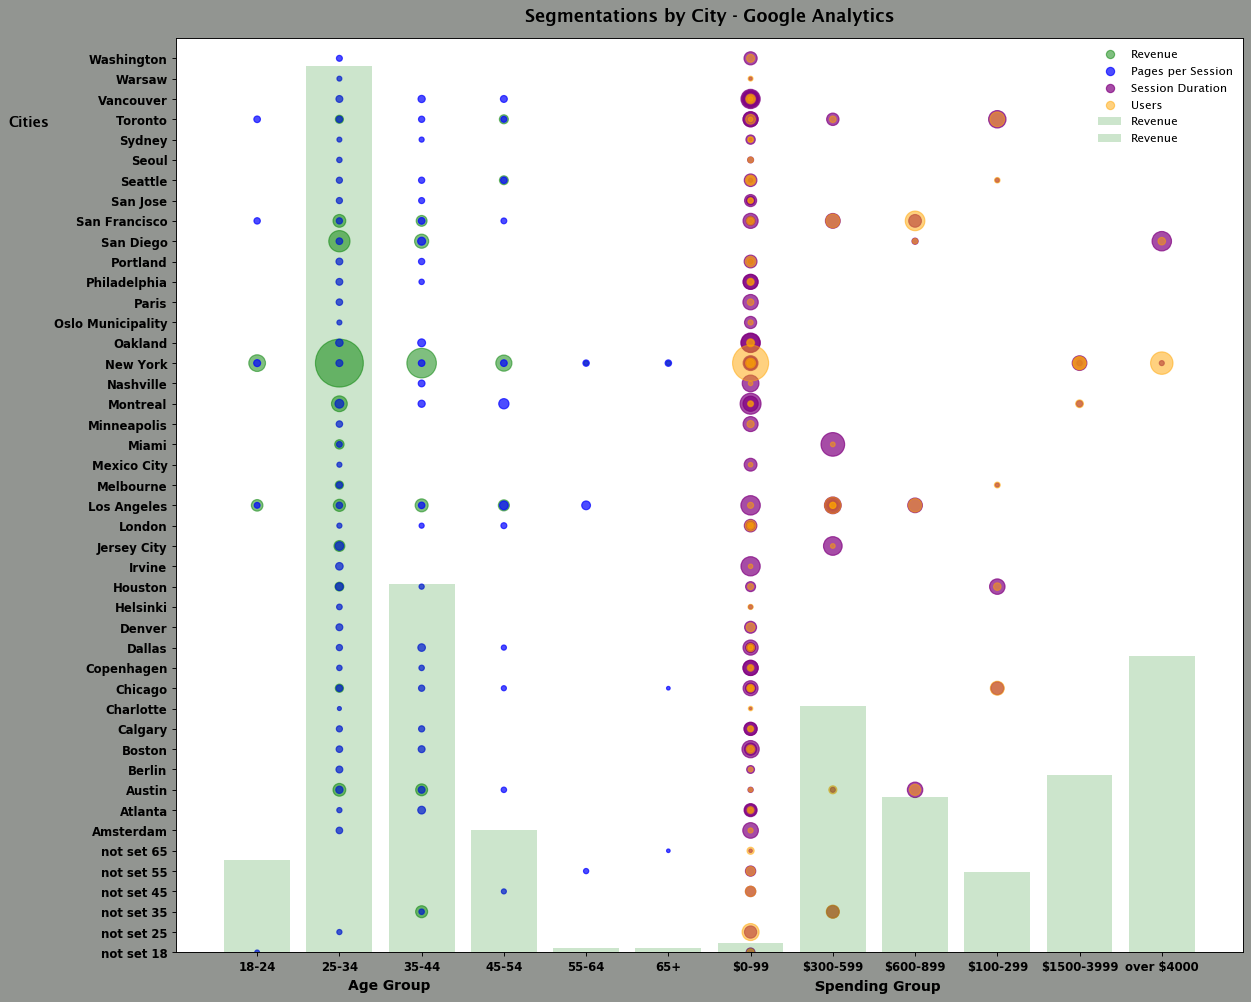

,Spent_Group,Revenue
0,$0-99,146.78
1,$100-299,1323.26
2,$300-599,4034.30
3,$600-899,2553.71
4,$1500-3999,2902.01
5,over $4000,4866.26


In [4]:

fig, ax1 = plt.subplots(figsize=(15,12), dpi=84) 
# ax = fig.add_subplot(111)
# fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(9,11), dpi=100)# plt.subplots(2, figsize=(7,5), dpi=100)  # plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
fig.patch.set_facecolor('xkcd:grey')
# plt.style.use('classic')
# fig.suptitle('SupTitle Filler', y=.95, **lucida_font)

verdana_font = {'fontname':'Verdana'}
helvetica_font = {'fontname':'Helvetica'}
lucida_font = {'fontname':'Lucida Sans'}

demo_age_city_.loc[demo_age_city_['Age'] == '18-24']
test = demo_age_city_.groupby('Age').sum().reset_index()
demo_age_city_.loc[demo_age_city_['Spent_Group'] == '18-24']
test2 = demo_age_city.groupby('Spent_Group').sum().reset_index()

demo_age_city_.loc[demo_age_city_['Spent_Group'] == '18-24']
test4 = demo_age_city.groupby('Spent_Group').sum().reset_index()
demo_age_city_.loc[demo_age_city_['Spent_Group'] == '18-24']
test3 = demo_age_city_.sort_values('Revenue', ascending = True).reset_index()

# ax1 = plt.subplot(111)
ax1.scatter(demo_age_city_['Age'], demo_age_city_['City'], s=demo_age_city_['Revenue']*.2, color='g',  alpha=0.5, label="Revenue")
ax1.scatter(demo_age_city_['Age'], demo_age_city_['City'], s=demo_data['Pages per Session']*3.3, color='b',  alpha=.7, label="Pages per Session")

ax1.bar(test['Age'], test['Revenue']*.003, color='g', alpha=0.2, label="Revenue")

ax1.scatter(demo_age_city_['Spent_Group'], demo_age_city_['City'], s=demo_data['AvgSeshDur']*.5, color='purple',  alpha=.7, label="Session Duration")
ax1.scatter(demo_age_city_['Spent_Group'], demo_age_city_['City'], s=demo_data['Users']*1.5, color='orange',  alpha=0.5, label="Users")

# ax1.bar(demo_age_city_['Spent_Group'], demo_age_city_['Revenue']*.0053, color='g',  alpha=0.2, label="Revenue")
ax1.bar(test4['Spent_Group'], test4['Revenue']*.003, color='g',  alpha=0.2, label="Revenue")


# ax.set_yticklabels([])
plt.title(f"Segmentations by City - Google Analytics", fontweight="bold", fontsize=15, y=1.01, **lucida_font)
plt.xlabel("Age Group", fontweight="bold", x=.2, fontsize=12, **verdana_font)
plt.suptitle("Spending Group", fontweight="bold", x=.7, y=0.025, **verdana_font)
plt.ylabel("Cities", fontweight="bold", fontsize=12, rotation=0, horizontalalignment='right', y=.9, **lucida_font)

# plt.subplots_adjust(top=0.9) ## pushes it up 

lgnd = plt.legend(loc="best", fontsize=10, prop={'family': 'Lucida Sans'}, 
                  title="", title_fontsize=12, facecolor="white", frameon=False, framealpha=1)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.legendHandles[3]._sizes = [50]
lgnd.legendHandles[4]._sizes = [10]
lgnd.legendHandles[5]._sizes = [10]


plt.ylim(0, 45)
fig.tight_layout()
# fig.autofmt_xdate()

plt.show()
# print(plt.style.available)
fig.savefig("Images/Segmentation_City_Age_Revenue_Users.png", facecolor=fig.get_facecolor())

demo_age_city_["Age"].count()
demo_data['Pages per Session']
demo_age_city_
test2

In [5]:
demo_age_city_.loc[demo_age_city_['Spent_Group'] == '18-24']
test2 = demo_age_city.groupby('Spent_Group').sum().reset_index()
test2

,Spent_Group,Revenue
0,$0-99,146.78
1,$100-299,1323.26
2,$300-599,4034.30
3,$600-899,2553.71
4,$1500-3999,2902.01
5,over $4000,4866.26


In [6]:
demo_age_city_.loc[demo_age_city_['Age'] == '18-24']
test = demo_age_city_.groupby('Age').sum().reset_index()
test

,Age,Revenue
0,18-24,1519.79
1,25-34,14535.13
2,35-44,6047.36
3,45-54,2003.30
4,55-64,74.44
5,65+,72.34


In [7]:
demo_age_city_.loc[demo_age_city_['Age'] == '18-24']
test4 = demo_age_city_.groupby('Age').sum().reset_index()
test4 = test4.sort_values('Revenue', ascending = True)
test4

,Age,Revenue
5,65+,72.34
4,55-64,74.44
0,18-24,1519.79
3,45-54,2003.30
2,35-44,6047.36
1,25-34,14535.13
